In [13]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
from lmfit import minimize, Parameters, fit_report

def sigmoid(x, x0, k, a, b):
    y = a / (1 + np.exp(-k*(x-x0))) + b
    return y

def residual(params, x, data):    
    #model = sigmoid(x, *[params[key].value for key in ['x0', 'k', 'a', 'b']])
    model = sigmoid(x, *params.values()) # assuming order of params is the same for efficiency
    return (data-model)

def fit_sigmoid(x, data, vary_a=False, vary_b=False):
  params = Parameters()
  params.add('x0', value=55, min=30, max=80)
  params.add('k', value=0.0)
  params.add('a', value=1.0, vary=vary_a)
  params.add('b', value=0.0, vary=vary_b)
  return minimize(residual, params, args=(x,data))


In [4]:
# Load data and fit TMT curves
tmt_data = pd.read_csv('../data/peptideTMT.csv')
names = ['37+','45+','55.2+','64.2+','73+']
tmt_data = pd.DataFrame(tmt_data[names].values, columns=names, index=tmt_data['sequence'])

_x = [37,45,55.2,64.2,73]
def df_fit_sigmoid(series):
    return fit_sigmoid(_x, series.values)

fits = tmt_data.apply(df_fit_sigmoid,axis=1)

In [8]:
pisa_data = tmt_data[['37+','45+','55.2+','64.2+']]
pisa_data

,37+,45+,55.2+,64.2+
sequence,,,,
RLQEDPPAGV,0.363214,0.424147,0.417055,0.034871
SLLDPVPEV,0.535776,0.785292,0.470340,0.007665
SLVESSEVA,0.477122,0.289450,0.748406,0.487561
RLQEDPPVGV,0.455441,0.436948,0.355500,0.013701
ELDRTPPEV,0.553014,0.728222,0.400788,0.036731
...,...,...,...,...
KILQGNENGNF,0.606037,0.747771,0.276977,0.480344
QIDNARLAAD,0.887218,0.362008,2.148165,0.692172
FTEQTAPK,0.451077,0.330861,0.396292,0.453230


In [35]:
x0_fits = fits.apply(lambda x: x.params['x0'].value)
chi2_fits = fits.apply(lambda x: x.chisqr)

pisa_data = tmt_data[['45+','55.2+','64.2+','73+']]
pisa_fits = pisa_data.loc[fits.index].sum(axis=1)
fits_df = pd.DataFrame({"x0":x0_fits, "chi2":chi2_fits, "pisa":pisa_fits}, index=tmt_data.index)

# Basic filtering
fits_df = fits_df[(fits_df['x0'] > 37) & (fits_df['x0'] < 62.5)]
fits_df = fits_df[(fits_df['chi2'] < 0.25)]
fits_df = fits_df[(fits_df['pisa'] < 3.0)]

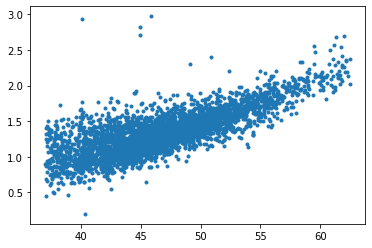

In [36]:
plt.plot(fits_df['x0'], fits_df['pisa'], '.')

In [37]:
fits_df['pisa'].to_csv('../data/tstab_data.csv', header=None, sep=' ')

In [38]:
import pandas as pd
hits = pd.read_csv('../data/tstab_data.csv', sep=' ', header=None, names=['seq','val'])

In [39]:
hits['allele'] = 'A0201'
hits['seq'] = hits['seq'].str.upper()

In [40]:
hits.to_csv('../data/tstab_data.txt', sep=' ', float_format='%.2f', index=False)

In [21]:
list(hits['val'].astype('float32').values)

[49.08162,
 39.905083,
 38.49527,
 47.609165,
 41.70295,
 49.041813,
 47.092903,
 44.860165,
 49.54811,
 42.963905,
 49.557922,
 50.16844,
 49.693287,
 46.35374,
 56.97297,
 47.63919,
 50.254692,
 46.791447,
 49.775394,
 45.652035,
 52.11039,
 46.621735,
 39.422707,
 45.15856,
 45.194126,
 45.828846,
 50.99035,
 43.51216,
 49.857986,
 47.057274,
 40.971573,
 47.736416,
 52.75255,
 50.514923,
 49.016663,
 49.17905,
 53.853386,
 53.01742,
 54.39931,
 42.568542,
 58.613365,
 42.815903,
 55.29755,
 48.69433,
 40.306446,
 55.057667,
 57.25193,
 44.43579,
 55.834675,
 44.812244,
 46.802757,
 50.03139,
 54.098747,
 38.161198,
 43.187656,
 55.08469,
 44.039433,
 42.536114,
 43.894024,
 42.296463,
 56.32091,
 46.349335,
 46.77531,
 37.30587,
 40.19345,
 45.65543,
 48.05418,
 50.775642,
 50.817715,
 57.736427,
 47.641094,
 42.89593,
 46.350254,
 43.813545,
 47.71946,
 54.062523,
 50.872658,
 44.998863,
 46.16743,
 46.102055,
 42.723797,
 43.0501,
 39.85183,
 43.597755,
 41.16283,
 46.286552,
 40